# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

pd.set_option('display.max_columns', 500) 

# Dataset

In [2]:
df = pd.read_csv('./data.csv')
df

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,fmi,fs,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,F,G,Good,Good,Vg,Good,Y,Unmarried,V,Paid,Medium,Average,Um,10,Farmer,Housewife,Large,Poor,Govt,Asm,Small,Good
1,M,OBC,Vg,Vg,Vg,Vg,N,Unmarried,V,Paid,Low,Average,Um,Il,Service,Service,Small,Poor,Govt,Asm,Average,Average
2,F,OBC,Good,Good,Vg,Good,N,Unmarried,V,Paid,Am,Average,12,10,Service,Housewife,Average,Average,Govt,Asm,Large,Good
3,M,MOBC,Pass,Good,Vg,Good,N,Unmarried,V,Paid,Medium,Small,12,Um,Business,Business,Large,Poor,Govt,Asm,Average,Average
4,M,G,Good,Good,Vg,Vg,N,Unmarried,V,Paid,Am,Average,10,12,Service,Housewife,Large,Poor,Private,Asm,Small,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,M,G,Pass,Good,Good,Pass,Y,Unmarried,T,Free,Low,Small,Um,Il,Service,Housewife,Small,Average,Govt,Asm,Small,Poor
127,M,MOBC,Vg,Vg,Good,Good,N,Unmarried,V,Free,High,Small,10,Um,Farmer,Housewife,Average,Poor,Govt,Asm,Small,Average
128,F,OBC,Good,Good,Vg,Good,N,Unmarried,V,Free,Am,Large,Il,Il,Farmer,Housewife,Small,Average,Govt,Asm,Large,Good
129,M,ST,Pass,Pass,Good,Pass,Y,Unmarried,V,Free,Low,Average,Um,Um,Service,Housewife,Average,Average,Govt,Asm,Large,Average


# Exploration and Visualization

## Data types

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ge      131 non-null    object
 1   cst     131 non-null    object
 2   tnp     131 non-null    object
 3   twp     131 non-null    object
 4   iap     131 non-null    object
 5   esp     131 non-null    object
 6   arr     131 non-null    object
 7   ms      131 non-null    object
 8   ls      131 non-null    object
 9   as      131 non-null    object
 10  fmi     131 non-null    object
 11  fs      131 non-null    object
 12  fq      131 non-null    object
 13  mq      131 non-null    object
 14  fo      131 non-null    object
 15  mo      131 non-null    object
 16  nf      131 non-null    object
 17  sh      131 non-null    object
 18  ss      131 non-null    object
 19  me      131 non-null    object
 20  tt      131 non-null    object
 21  atd     131 non-null    object
dtypes: object(22)
memory usage

## Missing Values

In [4]:
print(df.isnull().sum())
print(df.isna().sum())

ge     0
cst    0
tnp    0
twp    0
iap    0
esp    0
arr    0
ms     0
ls     0
as     0
fmi    0
fs     0
fq     0
mq     0
fo     0
mo     0
nf     0
sh     0
ss     0
me     0
tt     0
atd    0
dtype: int64
ge     0
cst    0
tnp    0
twp    0
iap    0
esp    0
arr    0
ms     0
ls     0
as     0
fmi    0
fs     0
fq     0
mq     0
fo     0
mo     0
nf     0
sh     0
ss     0
me     0
tt     0
atd    0
dtype: int64


## Distributions

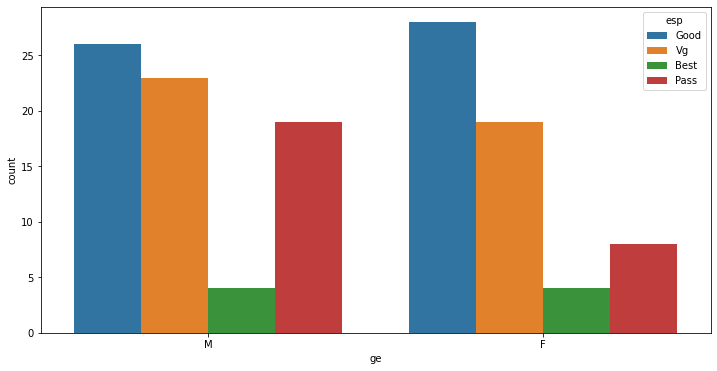

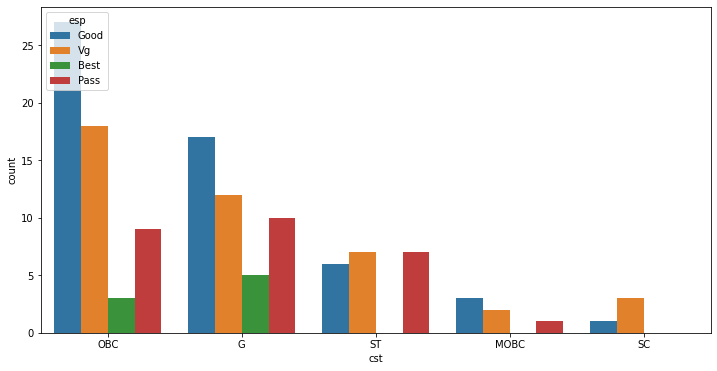

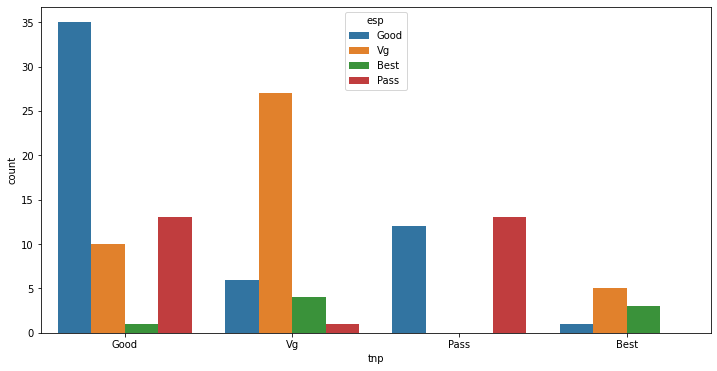

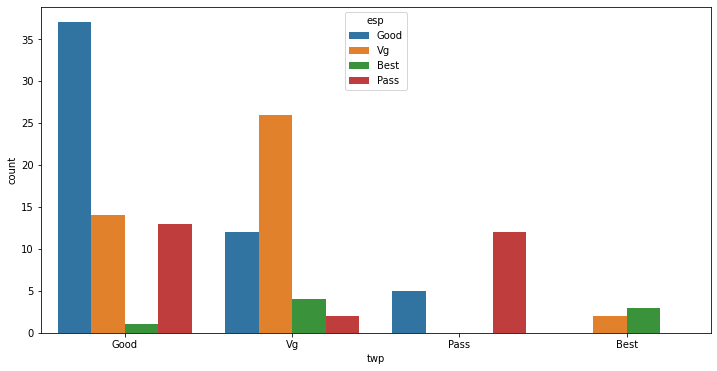

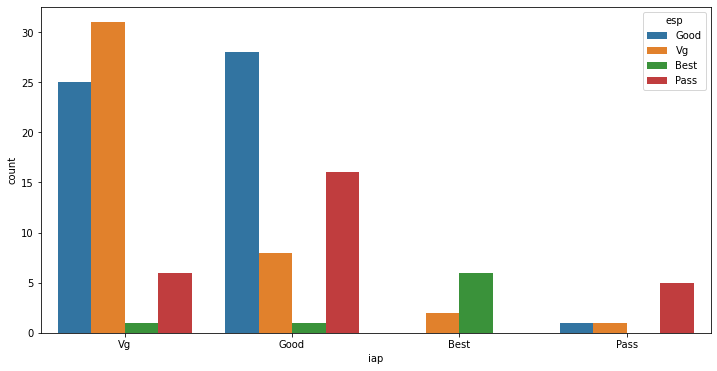

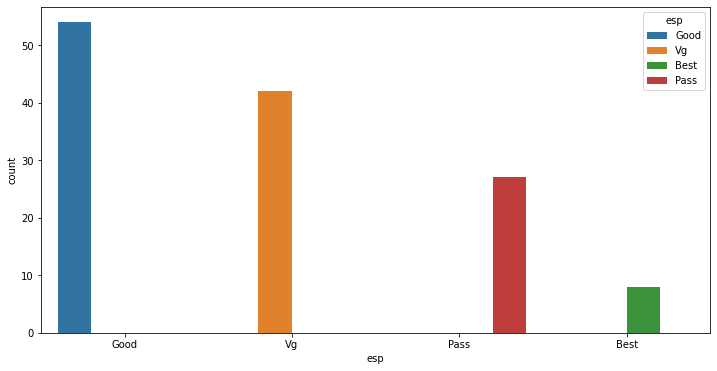

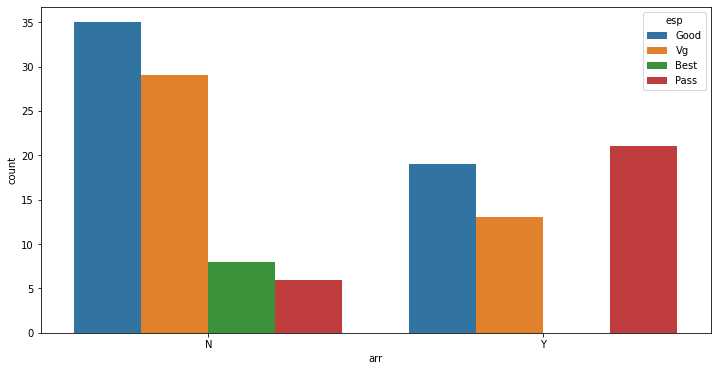

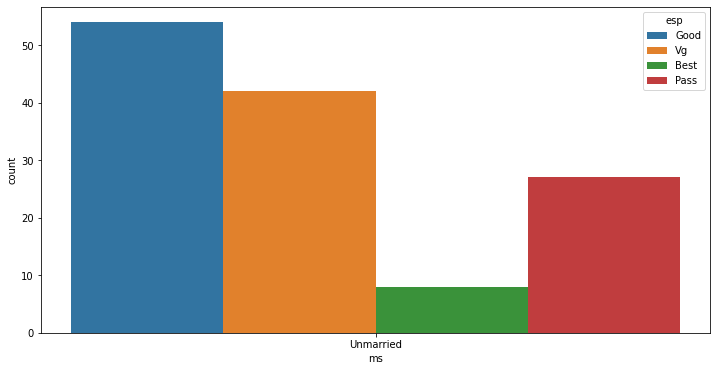

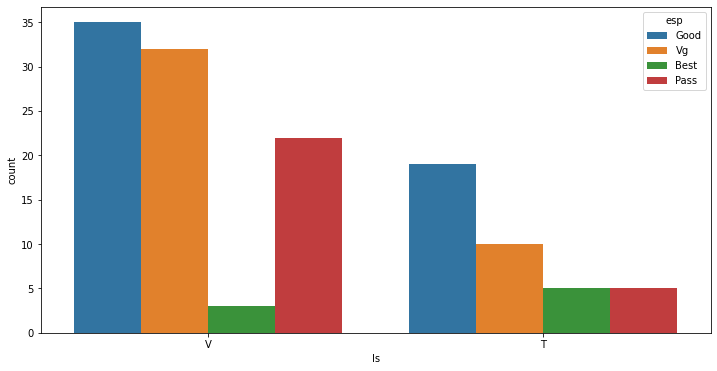

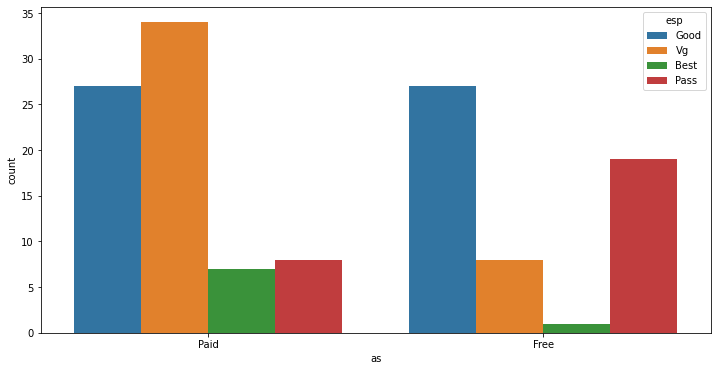

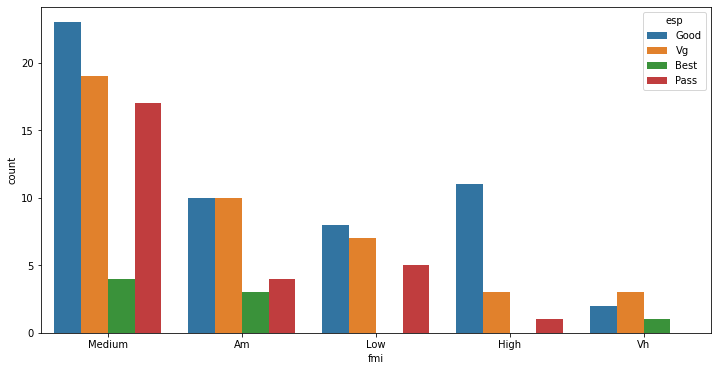

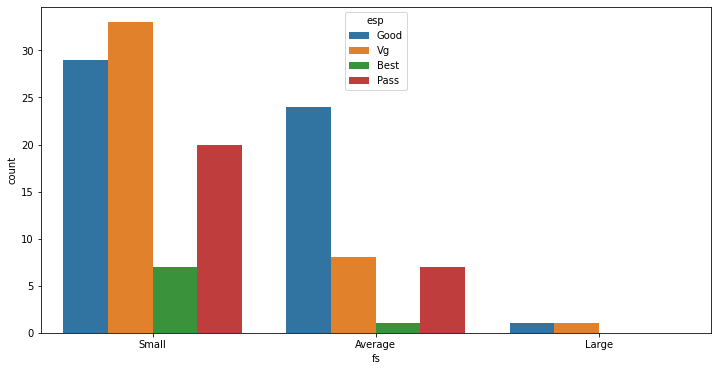

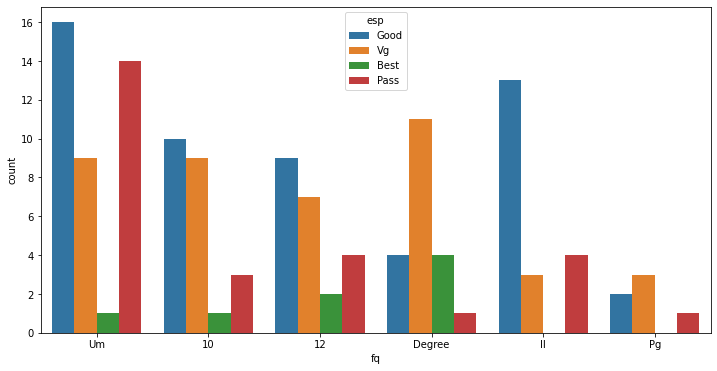

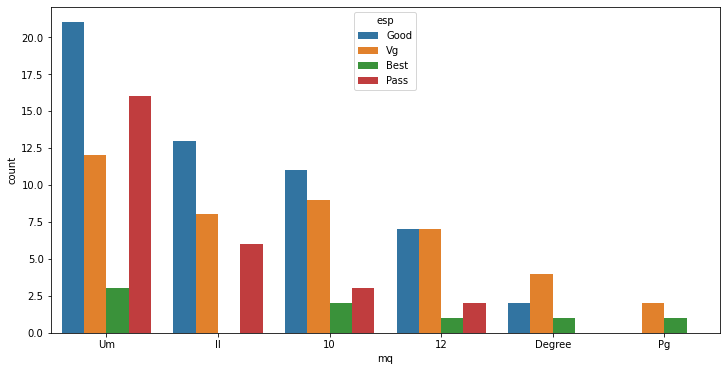

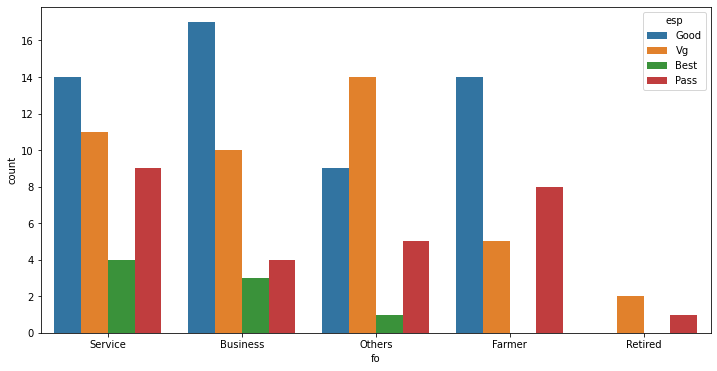

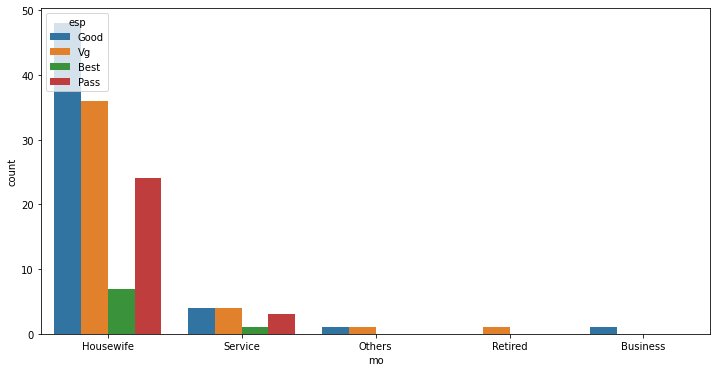

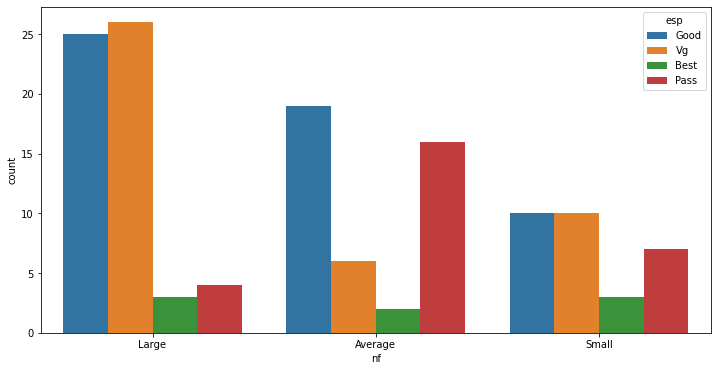

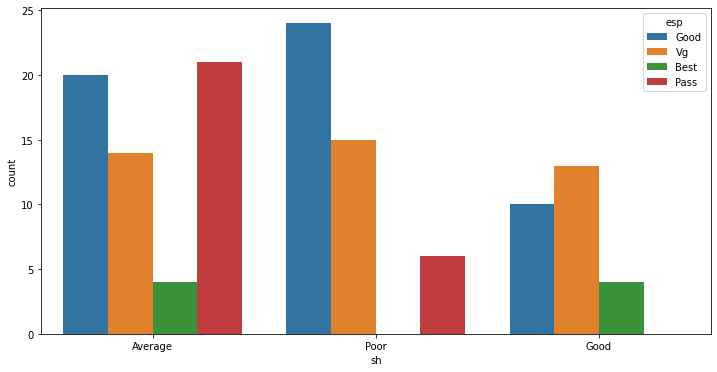

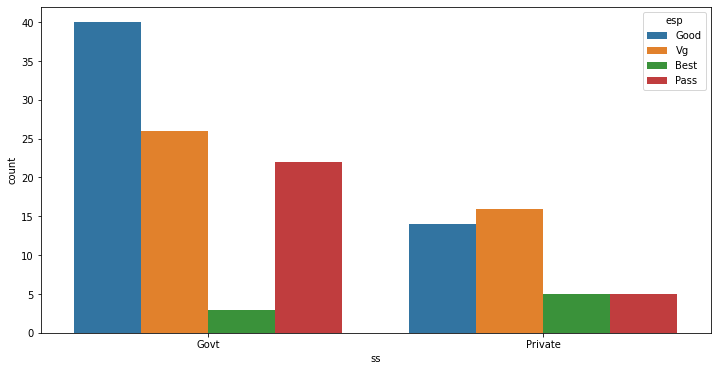

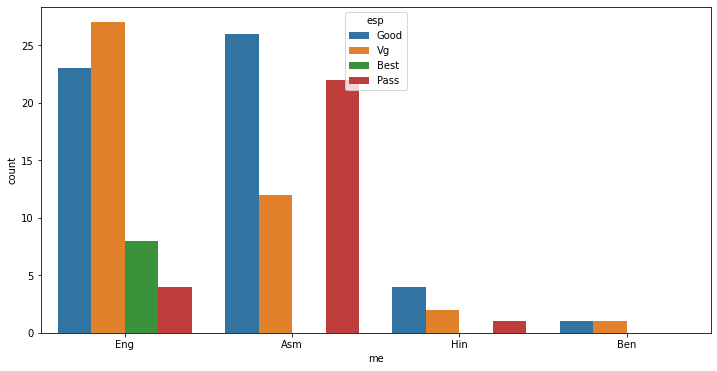

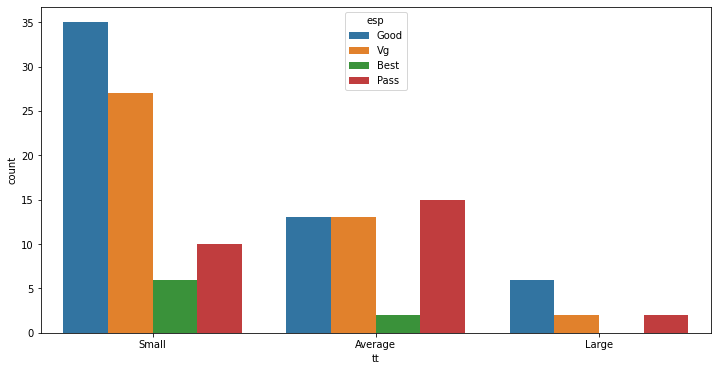

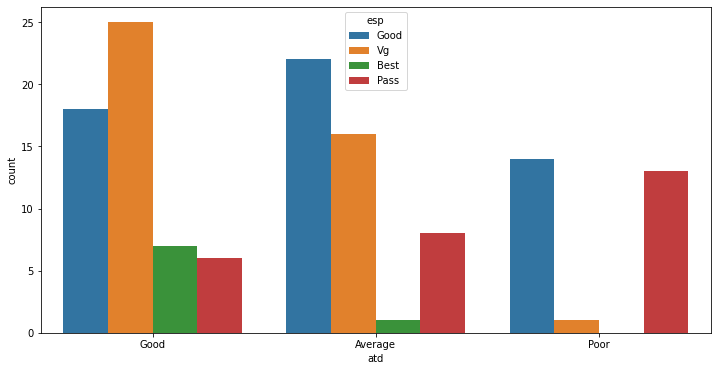

In [5]:
for col in df.columns:
    if df[col].dtype == np.object:
        descending_order = df[col].value_counts().sort_values(ascending=False).index
        plt.figure(figsize=(12,6))
        sns.countplot(data=df,x=df[col], hue="esp", order=descending_order)
        plt.show()

### Feature `ms` only contains a single value, so it does not provide any information; thus, it can be dropped!

In [6]:
df.drop('ms', axis=1, inplace=True)

In [7]:
# for backup between tests, ignore!
old_df = df.copy()

## Encoding

Notice that most values are not numeric.
However, they can be encoded in a more informative way than dummy encoding.

In [8]:
df = old_df.copy()

# most attributes are categorical, but they can be "sorted"
tnp_map = {'Best': 5, 'Vg': 4, 'Good': 3, 'Pass': 2, 'Fail': 1}
yes_no_map = {'Y': 1, 'N': 0}
large_small_map = {'Large': 3, 'Medium': 2, 'Small': 1}
# married_map = {'Married':1, 'Unmarried': 0}
ls_map = {'T': 1, 'V': 0}
as_map = {'Paid': 1, 'Free': 0}
fmi_map = {'Vh': 5, 'High': 4, 'Am': 3, 'Medium': 2, 'Low': 1}
fs_map = {'Small': 1, 'Average': 2, 'Large': 3}
fq_map = {'Il': 0, 'Um': 1, '10': 2, '12': 3, 'Degree': 4, 'Pg': 5}
sh_map = {'Poor': 0, 'Average': 1, 'Good': 2}
ss_map = {'Govt': 1, 'Private': 0}
nf_map = {'Large': 2, 'Average': 1, 'Small': 0}

df['ge'] = df['ge'].map({'F': 1, 'M': 0})
df['cst'] = df['cst'] #todo
for col in ['tnp', 'twp', 'iap', 'esp', ]:
    df[col] = df[col].map(tnp_map)
df['arr'] = df['arr'].map(yes_no_map)
# df['ms'] = df['ms'].map(married_map)
df['ls'] = df['ls'].map(ls_map)
df['as'] = df['as'].map(as_map)
df['fmi'] = df['fmi'].map(fmi_map)
df['fs'] = df['fs'].map(fs_map)
df['fq'] = df['fq'].map(fq_map)
df['mq'] = df['mq'].map(fq_map)
df['sh'] = df['sh'].map(sh_map)
df['atd'] = df['atd'].map(sh_map)
df['tt'] = df['tt'].map(fs_map)
df['ss'] = df['ss'].map(ss_map)
df['nf'] = df['nf'].map(nf_map)

# drop the rest of the columns
for col in ['cst', 'fo', 'mo', 'ss', 'me']:
    df.drop(col, axis=1, inplace=True)

df

,ge,tnp,twp,iap,esp,arr,ls,as,fmi,fs,fq,mq,nf,sh,tt,atd
0,1,3,3,4,3,1,0,1,2,2,1,2,2,0,1,2
1,0,4,4,4,4,0,0,1,1,2,1,0,0,0,2,1
2,1,3,3,4,3,0,0,1,3,2,3,2,1,1,3,2
3,0,2,3,4,3,0,0,1,2,1,3,1,2,0,2,1
4,0,3,3,4,4,0,0,1,3,2,2,3,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0,2,3,3,2,1,1,0,1,1,1,0,0,1,1,0
127,0,4,4,3,3,0,0,0,4,1,2,1,1,0,1,1
128,1,3,3,4,3,0,0,0,3,3,0,0,0,1,3,2
129,0,2,2,3,2,1,0,0,1,2,1,1,1,1,3,1


In [9]:
# sns.pairplot(df, hue='esp')

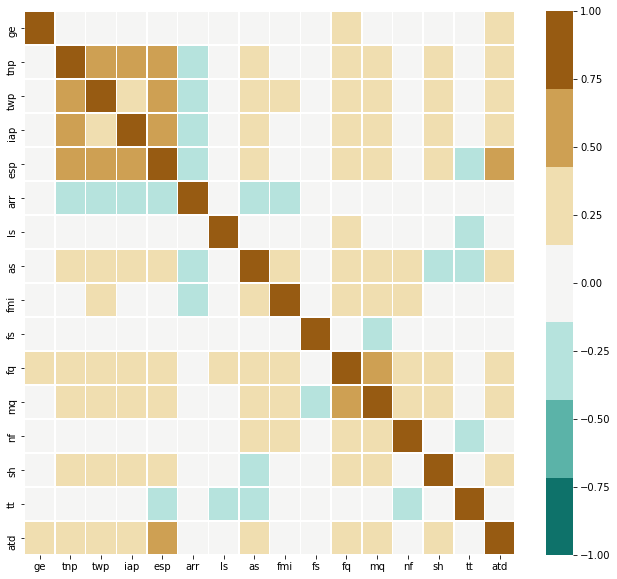

In [10]:
f, ax = plt.subplots(figsize=(11, 10))
sns.heatmap(pd.get_dummies(df).corr(), fmt="f", linewidths=.5, ax=ax, vmin=-1, vmax=1, cmap=sns.color_palette("BrBG_r", 7))

# Baseline Results

## Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# restore dataset to before visualization
# df = old_df.copy()

# separate features from label
X = df.drop('esp', axis=1)
y = df['esp']

X = MinMaxScaler().fit_transform(X)

df = pd.DataFrame(X, columns=df.drop('esp', axis=1).columns)
df

,ge,tnp,twp,iap,arr,ls,as,fmi,fs,fq,mq,nf,sh,tt,atd
0,1.0,0.333333,0.333333,0.666667,1.0,0.0,1.0,0.25,0.5,0.2,0.4,1.0,0.0,0.0,1.0
1,0.0,0.666667,0.666667,0.666667,0.0,0.0,1.0,0.00,0.5,0.2,0.0,0.0,0.0,0.5,0.5
2,1.0,0.333333,0.333333,0.666667,0.0,0.0,1.0,0.50,0.5,0.6,0.4,0.5,0.5,1.0,1.0
3,0.0,0.000000,0.333333,0.666667,0.0,0.0,1.0,0.25,0.0,0.6,0.2,1.0,0.0,0.5,0.5
4,0.0,0.333333,0.333333,0.666667,0.0,0.0,1.0,0.50,0.5,0.4,0.6,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0.0,0.000000,0.333333,0.333333,1.0,1.0,0.0,0.00,0.0,0.2,0.0,0.0,0.5,0.0,0.0
127,0.0,0.666667,0.666667,0.333333,0.0,0.0,0.0,0.75,0.0,0.4,0.2,0.5,0.0,0.0,0.5
128,1.0,0.333333,0.333333,0.666667,0.0,0.0,0.0,0.50,1.0,0.0,0.0,0.0,0.5,1.0,1.0
129,0.0,0.000000,0.000000,0.333333,1.0,0.0,0.0,0.00,0.5,0.2,0.2,0.5,0.5,1.0,0.5


In [12]:
# convert class to numeric for prediction
# y = y.map({'Best': 5, 'Vg': 4, 'Good': 3, 'Pass': 2, 'Fail': 1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print('Training:', X_train.shape, 'Testing:',  X_test.shape)

Training: (91, 15) Testing: (40, 15)


## Classification

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


algorithms = {
    'NB': GaussianNB(),
    'LR': LogisticRegression(),
    'DT': DecisionTreeClassifier(),
    'RF': RandomForestClassifier(),
    'AB': AdaBoostClassifier(),
}
y

0      3
1      4
2      3
3      3
4      4
      ..
126    2
127    3
128    3
129    2
130    2
Name: esp, Length: 131, dtype: int64

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

average_scores_split = {}
algorithms_copy = dict(algorithms)
for name, algo in algorithms_copy.items():
    print(algo, '\n\n\n')
    algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    print(confusion_matrix(y_test, y_pred), '\n\n\n')
    print(classification_report(y_test, y_pred), '\n\n\n')
    res = classification_report(y_test, y_pred, output_dict=True)
    average_scores_split[name] = {'accuracy': res['accuracy'], 'precision': res['macro avg']['precision'], 'recall': res['macro avg']['recall'], 'f1-score': res['macro avg']['f1-score']}
split_avg_scores = pd.DataFrame(average_scores_split).transpose()

GaussianNB(priors=None, var_smoothing=1e-09) 



[[6 0 0 0]
 [3 6 5 0]
 [0 5 9 0]
 [0 1 5 0]] 



              precision    recall  f1-score   support

           2       0.67      1.00      0.80         6
           3       0.50      0.43      0.46        14
           4       0.47      0.64      0.55        14
           5       0.00      0.00      0.00         6

    accuracy                           0.53        40
   macro avg       0.41      0.52      0.45        40
weighted avg       0.44      0.53      0.47        40
 



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 



[[ 4  2  0  0]
 [ 1 10  3  0]
 [ 0  6  8  0]
 [ 0  1  5  0]] 



              precision    recall  f1-score   support

           2 

/home/alex-d/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alex-d/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alex-d/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/alex-d/.local/lib/python3.8/site-p

[[ 2  4  0  0]
 [ 4  6  4  0]
 [ 1  3 10  0]
 [ 0  1  5  0]] 



              precision    recall  f1-score   support

           2       0.29      0.33      0.31         6
           3       0.43      0.43      0.43        14
           4       0.53      0.71      0.61        14
           5       0.00      0.00      0.00         6

    accuracy                           0.45        40
   macro avg       0.31      0.37      0.34        40
weighted avg       0.38      0.45      0.41        40
 





/home/alex-d/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Visualization

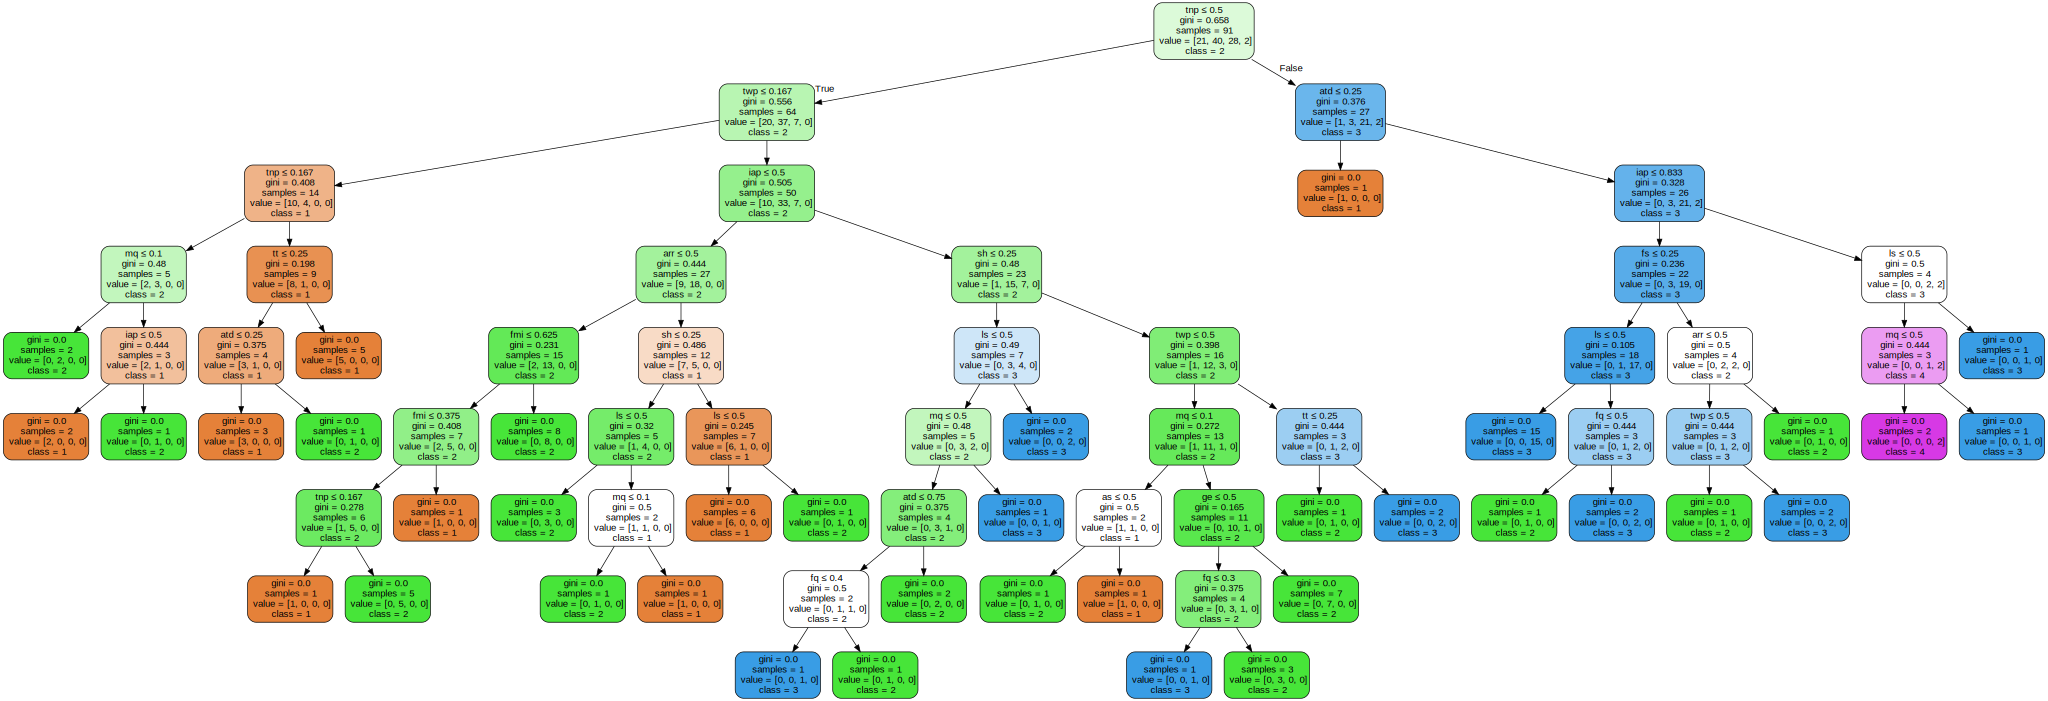

In [15]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(algorithms_copy['DT'], out_file=None,
    feature_names=df.columns,
    class_names=['1','2','3','4','5'],
    filled=True, rounded=True,
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

## 5-fold Cross Validation

In [16]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, make_scorer

scorers = {
    **{'precision_' + str(i): make_scorer(precision_score, average = None, labels = [i], zero_division=0) for i in range(2,6)},
    'precision_average': make_scorer(precision_score, average='macro', zero_division=0),
    **{'recall_' + str(i): make_scorer(recall_score, average = None, labels = [i], zero_division=0) for i in range(2,6)},
    'recall_average': make_scorer(recall_score, average='macro', zero_division=0),
    **{'f1_score_' + str(i): make_scorer(f1_score, average = None, labels = [i], zero_division=0) for i in range(2,6)},
    'f1_average': make_scorer(f1_score, average='macro'),
    'accuracy': make_scorer(accuracy_score)
}

average_scores = {}
for name, algo in dict(algorithms).items():
    res = cross_validate(algo, X, y, cv=5, scoring=scorers, n_jobs=-1)
    res = {k: v.mean() for k, v in res.items()}
    labels = list(range(2,6))
    res_df_dict = {'label': labels, 'precision': [res['test_precision_' + str(i)] for i in labels], 'recall': [res['test_recall_' + str(i)] for i in labels], 'f1_score': [res['test_f1_score_' + str(i)] for i in labels]}
    res_df = pd.DataFrame(res_df_dict)
    print('\n\n', algo, '\n\n')
    print(res_df)
    print('\nAccuracy:', res['test_accuracy'])
    print('Average Precision:', res['test_precision_average'])
    print('Average Recall:', res['test_recall_average'])
    print('Average F1-scoree:', res['test_f1_average'])
    average_scores['CV_' + name] = {'accuracy': res['test_accuracy'], 'precision': res['test_precision_average'], 'recall': res['test_recall_average'], 'f1-score': res['test_f1_average']}
cv_avg_scores = pd.DataFrame(average_scores).transpose()



 GaussianNB(priors=None, var_smoothing=1e-09) 


   label  precision    recall  f1_score
0      2   0.536111  0.626667  0.543590
1      3   0.636667  0.518182  0.561812
2      4   0.638333  0.336111  0.393383
3      5   0.191667  0.700000  0.275094

Accuracy: 0.48888888888888893
Average Precision: 0.5006944444444444
Average Recall: 0.545239898989899
Average F1-scoree: 0.4434697375208211


 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 


   label  precision    recall  f1_score
0      2   0.578968  0.666667  0.585714
1      3   0.634488  0.596364  0.607426
2      4   0.585680  0.702778  0.624864
3      5   0.000000  0.000000  0.000000

Accuracy: 0.6108262108262108
Average Precision: 0.4497840802987862
Average 

In [31]:
split_avg_scores

,accuracy,precision,recall,f1-score
NB,0.525,0.410088,0.517857,0.451748
LR,0.550,0.456579,0.488095,0.466667
DT,0.475,0.343750,0.410714,0.369586
RF,0.675,0.566071,0.625000,0.590336
AB,0.450,0.310150,0.369048,0.335581


## Comparison

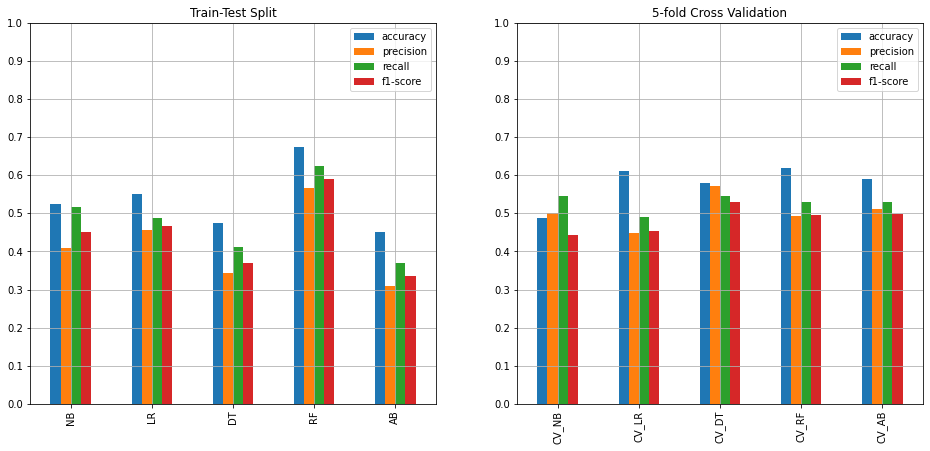

In [18]:
f, ax = plt.subplots(1,2, figsize=(16, 7))
combined_scores = split_avg_scores.append(cv_avg_scores)
plt.setp(ax, ylim=(0,1), yticks=[i/10 for i in range(11)])


split_avg_scores.plot(ax=ax[0], kind='bar', grid=True, title='Train-Test Split')
cv_avg_scores.plot(ax=ax[1], kind='bar', grid=True, title='5-fold Cross Validation')

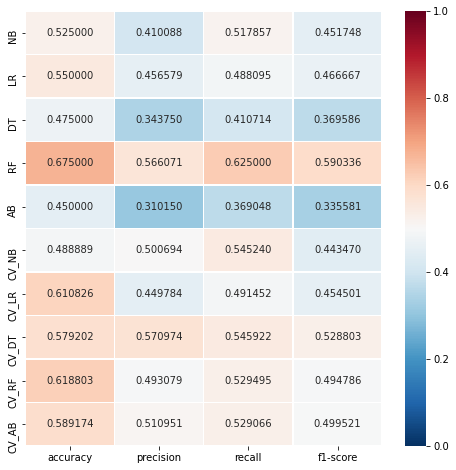

In [19]:
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(combined_scores, fmt="f", cmap='RdBu_r', linewidths=.5, ax=ax, vmin=0, vmax=1, annot=True)

# Feature Selection

## Feature Importance - RandomForest

<BarContainer object of 15 artists>

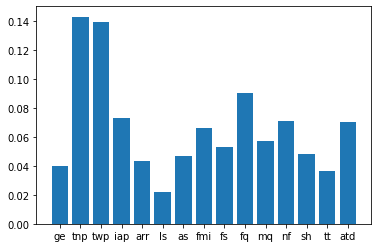

In [21]:
importances = algorithms_copy['RF'].feature_importances_
plt.bar([x for x in range(len(importances))], importances, tick_label=df.columns)

## Feature Importance - DecisionTree

<BarContainer object of 15 artists>

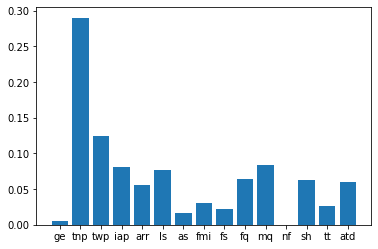

In [23]:
importances = algorithms_copy['DT'].feature_importances_
plt.bar([x for x in range(len(importances))], importances, tick_label=df.columns)

In [24]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif

fs_scores_split = {}
algorithms_copy = dict(algorithms)
X_new = SelectKBest(mutual_info_classif, k=10).fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3)
for name, algo in algorithms_copy.items():
    print(algo, '\n\n\n')    
    print(X_train.shape)
    algo.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    print(confusion_matrix(y_test, y_pred), '\n\n\n')
    print(classification_report(y_test, y_pred), '\n\n\n')
    res = classification_report(y_test, y_pred, output_dict=True)
    fs_scores_split['FS_' + name] = {'accuracy': res['accuracy'], 'precision': res['macro avg']['precision'], 'recall': res['macro avg']['recall'], 'f1-score': res['macro avg']['f1-score']}
fs = pd.DataFrame(fs_scores_split).transpose()

GaussianNB(priors=None, var_smoothing=1e-09) 



(91, 10)
[[ 3  0  0  1]
 [ 1 10  3  4]
 [ 0  5  6  5]
 [ 0  0  1  1]] 



              precision    recall  f1-score   support

           2       0.75      0.75      0.75         4
           3       0.67      0.56      0.61        18
           4       0.60      0.38      0.46        16
           5       0.09      0.50      0.15         2

    accuracy                           0.50        40
   macro avg       0.53      0.55      0.49        40
weighted avg       0.62      0.50      0.54        40
 



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 



(91, 10)
[[ 3  1  0  0]
 [ 3 13  2  0]
 [ 0  9  7  0]
 [ 0  0  2  0]] 



              precision    recall 

/home/alex-d/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[ 4  0  0  0]
 [ 3 12  3  0]
 [ 1  5 10  0]
 [ 0  0  2  0]] 



              precision    recall  f1-score   support

           2       0.50      1.00      0.67         4
           3       0.71      0.67      0.69        18
           4       0.67      0.62      0.65        16
           5       0.00      0.00      0.00         2

    accuracy                           0.65        40
   macro avg       0.47      0.57      0.50        40
weighted avg       0.63      0.65      0.63        40
 





/home/alex-d/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
cv_avg_scores

,accuracy,precision,recall,f1-score
CV_NB,0.488889,0.500694,0.545240,0.443470
CV_LR,0.610826,0.449784,0.491452,0.454501
CV_DT,0.579202,0.570974,0.545922,0.528803
CV_RF,0.618803,0.493079,0.529495,0.494786
CV_AB,0.589174,0.510951,0.529066,0.499521
